In [8]:
#para iniciar cargamos los datos, cabeceras, estadisticas y todo lo que hemos visto anteriormente
import numpy as np
import pandas as pd
import matplotlib as plt

df = pd.read_csv('fish.csv')
print(df.info())
print(df.head())
print(df.describe().round(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None
  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
        Weight  Length1  Length2  Length3  Height   Width
count   159.00   159.00   159.00   159.00  159.00  159.00
mean    3

In [9]:
#calculamos el radio como promedio
df['radius'] = (df['Length1'] + df['Length2'] + df['Length3']) / 3 / 2

#calculamos el area (suponiendo una base circular como lo pide el desafio)
df['base_area'] = np.pi * (df['radius'] ** 2)

#asumiremos la altura como la longitud
df['height'] = df[['Length1', 'Length2', 'Length3']].max(axis=1)

#calculamos el volumen con la formulta area*height
df['volume'] = df['base_area'] * df['height']

#mostramos los primeros elementos de la nueva columna
print(df.head())


  Species  Weight  Length1  Length2  Length3   Height   Width     radius  \
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200  13.100000   
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056  13.583333   
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961  13.583333   
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555  14.800000   
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340  14.916667   

    base_area  height        volume  
0  539.128715    30.0  16173.861458  
1  579.645661    31.2  18084.944630  
2  579.645661    31.1  18026.980063  
3  688.134455    33.5  23052.504237  
4  699.026182    34.0  23766.890189  


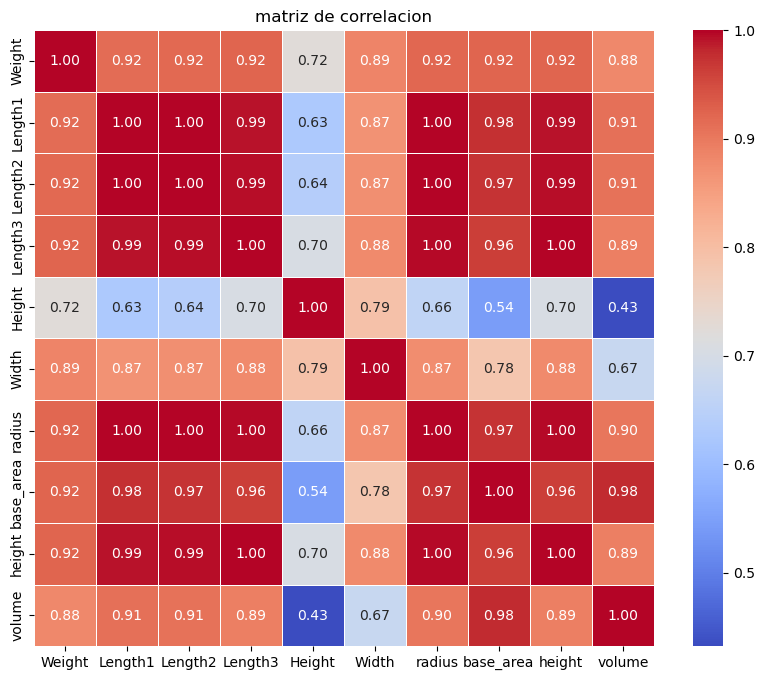

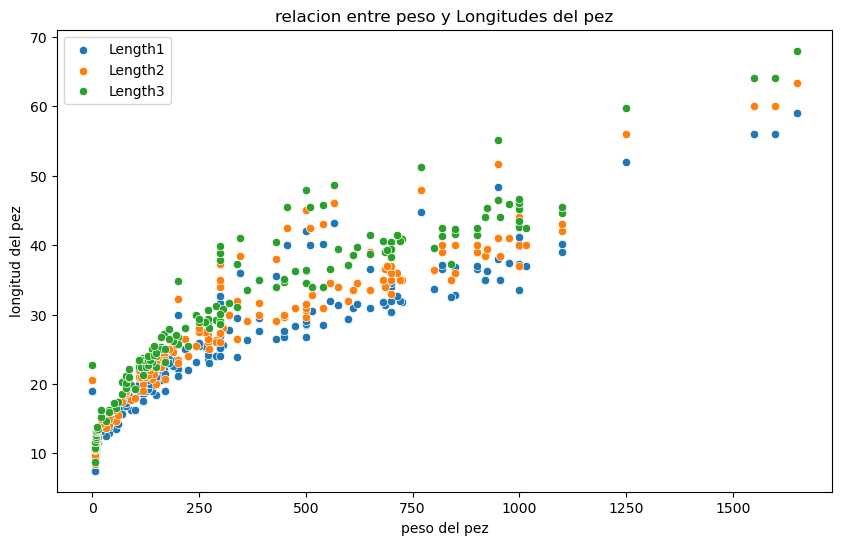

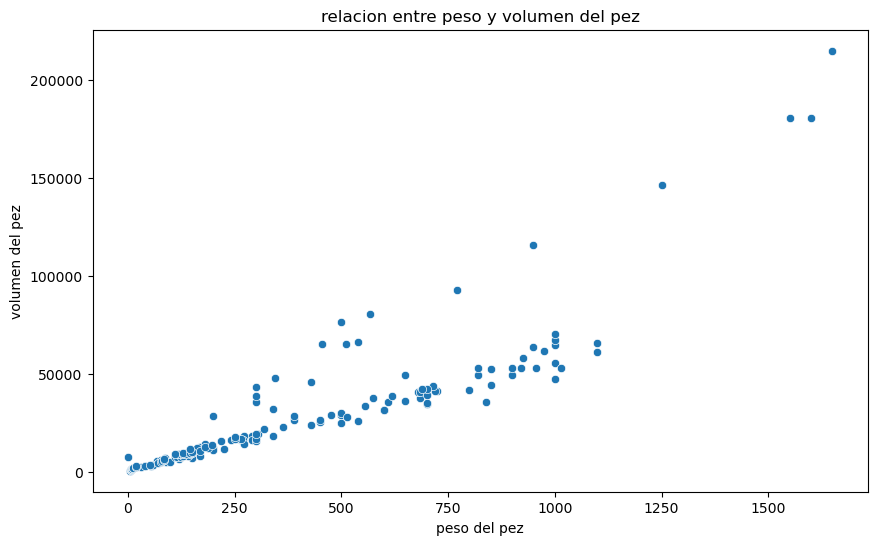

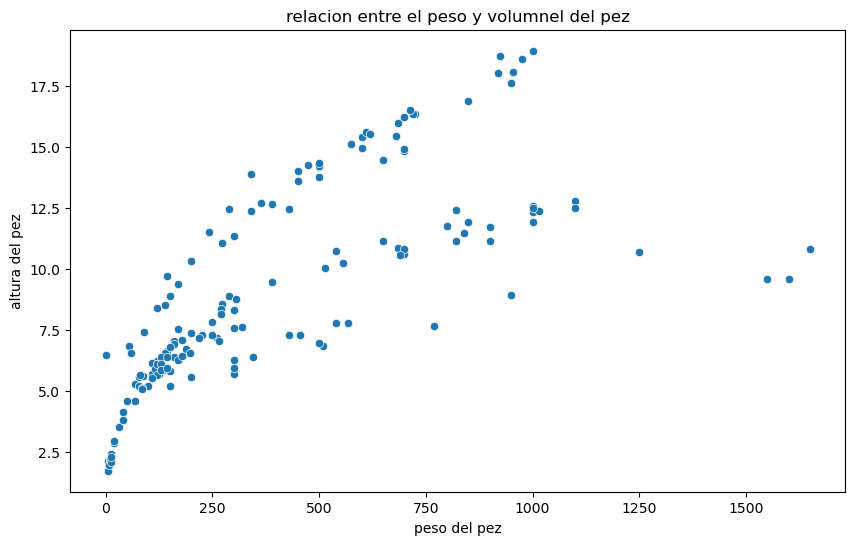

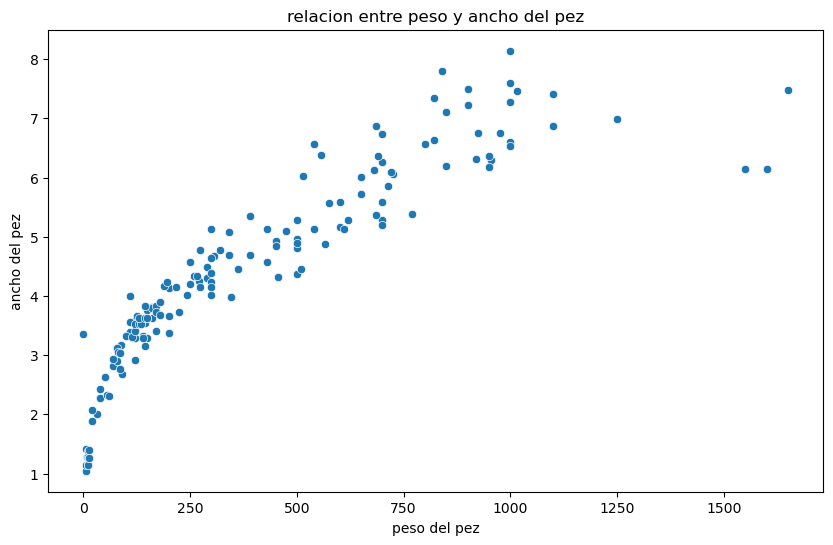

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

#exlcuiremos la columna ya que son strings y necesitamos  dato numericos
numeric_df = df.drop(columns=['Species'])

#calculamos la matriz de correlacion
correlation_matrix = numeric_df.corr()

#graficamos la matriz con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('matriz de correlacion')
plt.show()

#graficamos el peso vs la longitud
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Length1', data=df, label='Length1')
sns.scatterplot(x='Weight', y='Length2', data=df, label='Length2')
sns.scatterplot(x='Weight', y='Length3', data=df, label='Length3')
plt.xlabel('peso del pez')
plt.ylabel('longitud del pez')
plt.title('relacion entre peso y Longitudes del pez')
plt.legend()
plt.show()

#graficamos el peso vs el volumen
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='volume', data=df)
plt.xlabel('peso del pez')
plt.ylabel('volumen del pez')
plt.title('relacion entre peso y volumen del pez')
plt.show()

#graficamos el peso vs la altura
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Height', data=df)
plt.xlabel('peso del pez')
plt.ylabel('altura del pez')
plt.title('relacion entre el peso y volumnel del pez')
plt.show()

#graficamos el peso vs el ancho
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Width', data=df)
plt.xlabel('peso del pez')
plt.ylabel('ancho del pez')
plt.title('relacion entre peso y ancho del pez')
plt.show()



coeficiente de la pendiente: 0.00955726845803218
intercepto: 121.50413986186015
coeficiente de determinación (R^2): 0.776237376652106


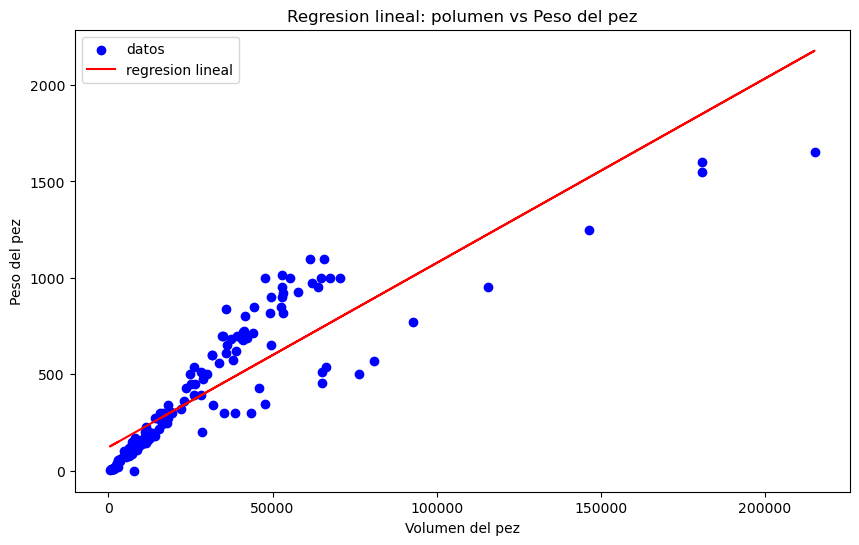

In [16]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#creamos el objeto regresion lineal
model = LinearRegression()

#separamoe el volumen y la variable peso
X = df[['volume']]
y = df['Weight']

#ajustamos el modelo
model.fit(X, y)

#graficamos el modelo
print("coeficiente de la pendiente:", model.coef_[0])
print("intercepto:", model.intercept_)

#calculamos el coeficiente de det(r-cuadrado) segun la guia
r_squared = model.score(X, y)
print("coeficiente de determinación (R^2):", r_squared)

#graficamos el modelo de regresion
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='datos')
plt.plot(X, model.predict(X), color='red', label='regresion lineal')
plt.xlabel('Volumen del pez')
plt.ylabel('Peso del pez')
plt.title('Regresion lineal: polumen vs Peso del pez')
plt.legend()
plt.show()


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#seleccionamos las variables independientes
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]

#seleccionamos la variable objetivo que sera el peso
y = df['Weight']

#serapamos los datos en conjuntos de entrenamiento y prueba (para cada uno)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#creamos el objeto nuevamente de regresion lineal
model = LinearRegression()

#ajustamos el modelo a los datos
model.fit(X_train, y_train)

#evaluamos el modelo segun las pruebas
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

#imprimiremos los resultados
print("error cuadratico medio (MSE):", mse)
print("coeficiente de determinacion (R^2):", r_squared)


error cuadratico medio (MSE): 16763.887193140763
coeficiente de determinacion (R^2): 0.8821430593048694


In [17]:
import statsmodels.api as sm

# seleccionamos las variables independientes
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]

#creamos la nueva contante
X = sm.add_constant(X)

#seleccionamos la variable peso como obj
y = df['Weight']

#creamos el modelo ols
model = sm.OLS(y, X)

#ajustamos los datos
results = model.fit()

#imrpimimos los resultados
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Tue, 07 May 2024   Prob (F-statistic):           4.95e-70
Time:                        19:20:56   Log-Likelihood:                -987.96
No. Observations:                 159   AIC:                             1988.
Df Residuals:                     153   BIC:                             2006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -499.5870     29.572    -16.894      0.0